# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint 
from datetime import datetime

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [122]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?" 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        kelvin = city_weather['main']['temp_max']
        city_max_temp = (kelvin*(9/5)-459.67)
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sitka
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | popondetta
Processing Record 4 of Set 1 | tokar
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | kulia village
City not found. Skipping...
Processing Record 8 of Set 1 | mumbwa
Processing Record 9 of Set 1 | bejubang dua
City not found. Skipping...
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | parabel'
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | cable beach
City not found. Skipping...
Processing Record 17 of Set 1 | whitehorse
Processing Record 18 of Set 1 | fauske
Processing Record 19 of Set 1 | le hocq
City not found. Skipping...
Processing Record 

In [123]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [124]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sitka,57.0531,-135.3300,46.292,66,75,2.06,US,1714965826
1,kodiak,57.7900,-152.4072,42.314,81,100,7.20,US,1714965550
2,popondetta,-8.7537,148.2534,89.114,63,60,2.58,PG,1714965827
3,tokar,18.4254,37.7290,75.830,71,0,1.31,SD,1714965827
4,edinburgh of the seven seas,-37.0676,-12.3116,55.832,70,100,14.66,SH,1714965827


In [125]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [126]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sitka,57.0531,-135.3300,46.292,66,75,2.06,US,1714965826
1,kodiak,57.7900,-152.4072,42.314,81,100,7.20,US,1714965550
2,popondetta,-8.7537,148.2534,89.114,63,60,2.58,PG,1714965827
3,tokar,18.4254,37.7290,75.830,71,0,1.31,SD,1714965827
4,edinburgh of the seven seas,-37.0676,-12.3116,55.832,70,100,14.66,SH,1714965827


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

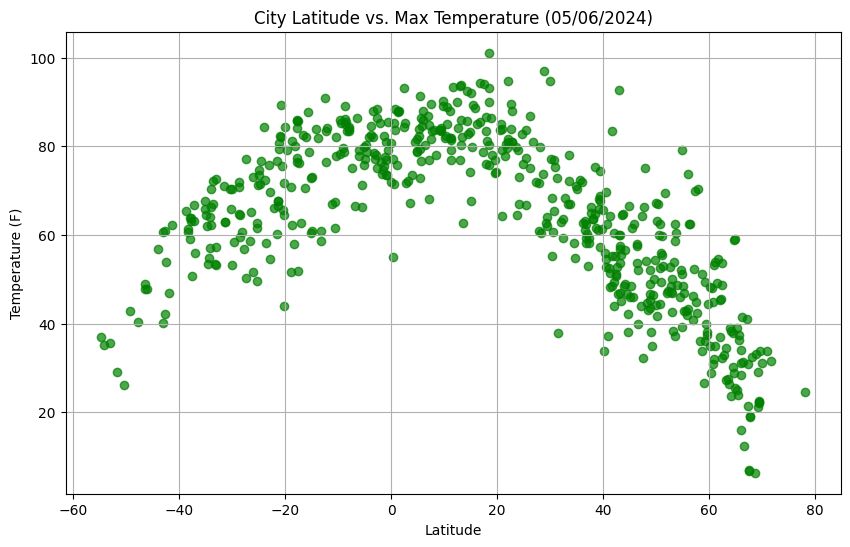

In [127]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color='green', alpha=0.7)

# Convert the date from Unix timestamp to a datetime object
date_obj = datetime.utcfromtimestamp(city_date)

# Format the date in MM/DD/YYYY format
formatted_date = date_obj.strftime("%m/%d/%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({formatted_date})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

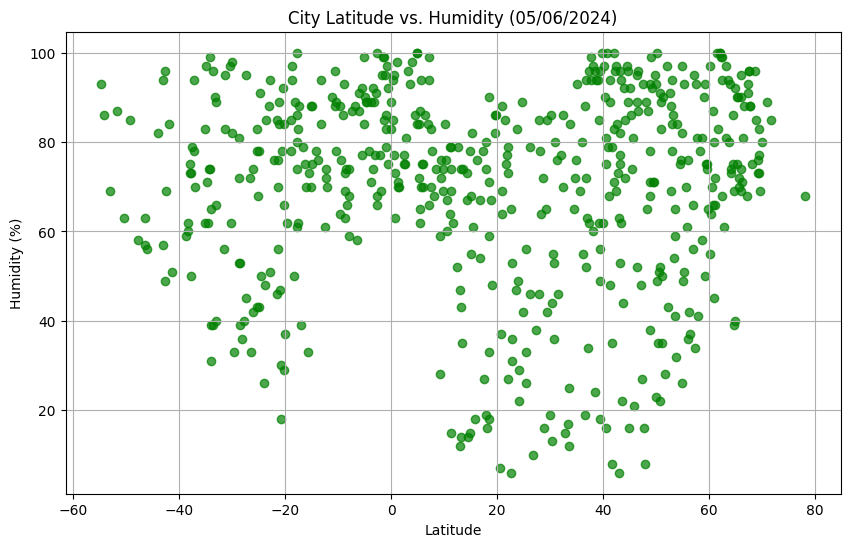

In [128]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color='green', alpha=0.7)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({formatted_date})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

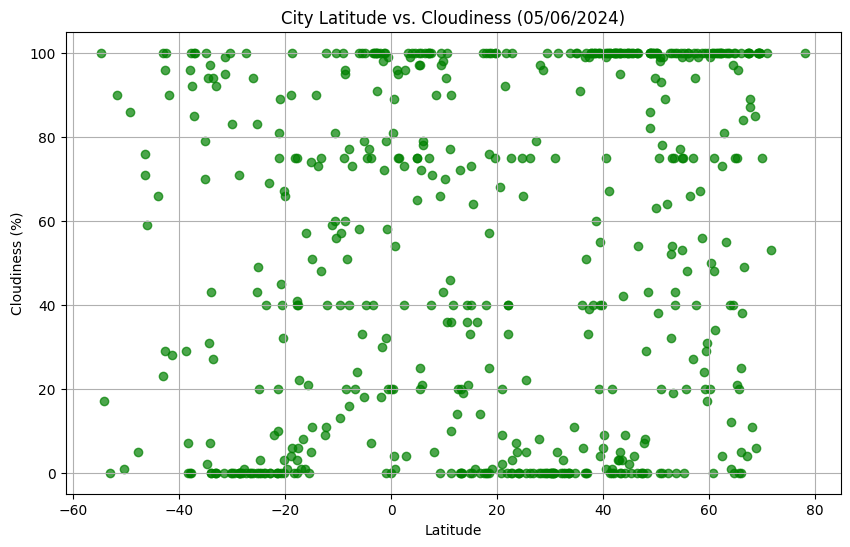

In [129]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color='green', alpha=0.7)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({formatted_date})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

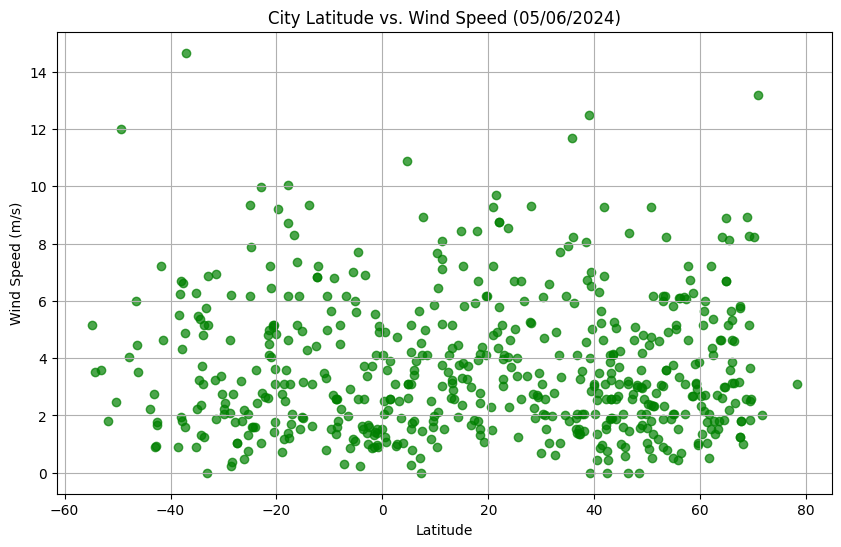

In [130]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color='green', alpha=0.7)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({formatted_date})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [131]:
# Define a function to create Linear Regression plots
def plot_lin_reg(x_values, y_values, titles, text_coordinates, title="Linear Regression Plot"):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression = x_values * slope + intercept
    
    line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regression, color='red')
    plt.annotate(line_eq, text_coordinates, fontsize=16, color="red")
    plt.grid(True)
    plt.xlabel("Latitude")
    plt.ylabel(titles)
    plt.title(title)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [132]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sitka,57.0531,-135.3300,46.292,66,75,2.06,US,1714965826
1,kodiak,57.7900,-152.4072,42.314,81,100,7.20,US,1714965550
3,tokar,18.4254,37.7290,75.830,71,0,1.31,SD,1714965827
5,jamestown,42.0970,-79.2353,60.440,100,100,3.09,US,1714965827
7,iqaluit,63.7506,-68.5145,26.330,80,100,4.63,CA,1714965828


In [133]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,popondetta,-8.7537,148.2534,89.114,63,60,2.58,PG,1714965827
4,edinburgh of the seven seas,-37.0676,-12.3116,55.832,70,100,14.66,SH,1714965827
6,mumbwa,-14.9783,27.0619,60.962,75,11,1.92,ZM,1714965827
8,waitangi,-43.9535,-176.5597,56.822,82,66,2.24,NZ,1714965828
9,port-aux-francais,-49.3500,70.2167,42.818,85,86,12.00,TF,1714965828


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8571563143631687


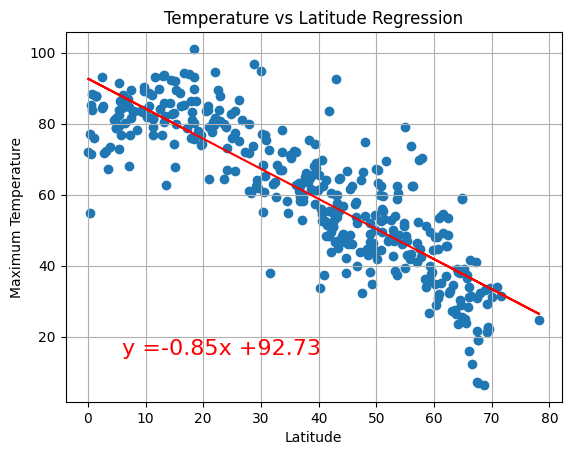

In [135]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_lin_reg(x_values, y_values, "Maximum Temperature", (6, 15), "Temperature vs Latitude Regression")


The r-value is: 0.7546386652904666


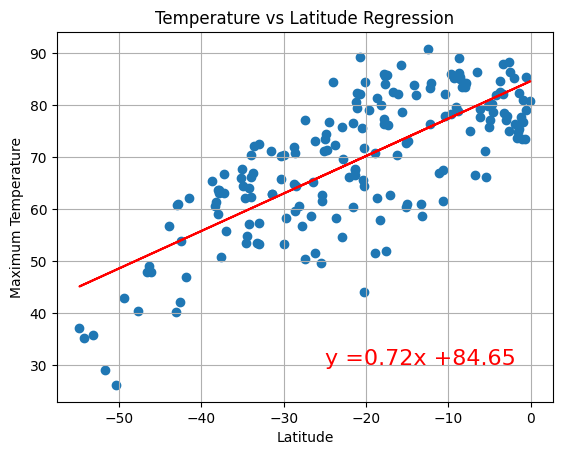

In [137]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_lin_reg(x_values, y_values, "Maximum Temperature", (-25, 30), "Temperature vs Latitude Regression")

**Discussion about the linear relationship:** In both hemispheres, there is a strong correlation between latitude and maximum temperature. In each case, the close to the equator the latitude of the locaitno is, the higher the maximum temperature recorded. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1326659483455612


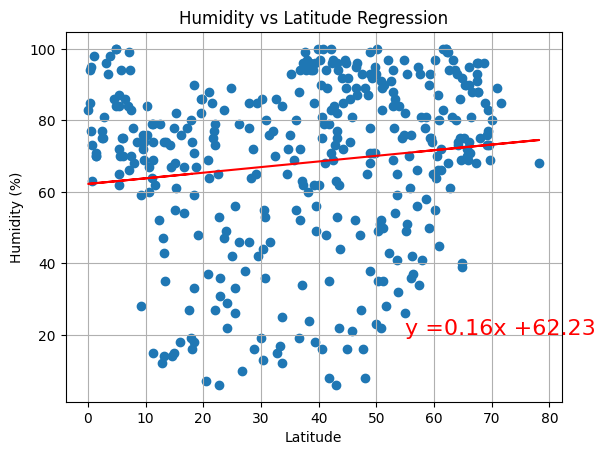

In [138]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_lin_reg(x_values, y_values, "Humidity (%)", (55, 20), "Humidity vs Latitude Regression")

The r-value is: 0.25304244777490625


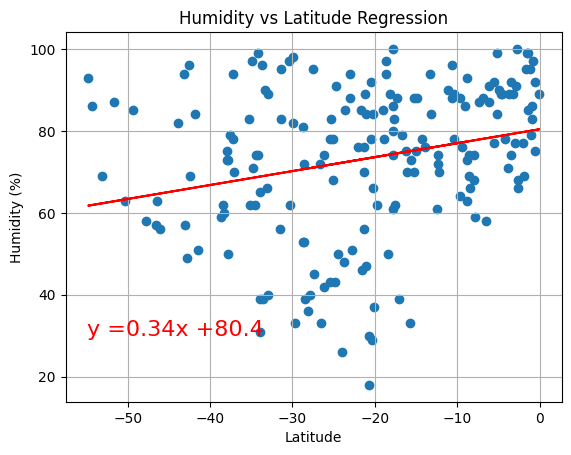

In [139]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_lin_reg(x_values, y_values, "Humidity (%)", (-55, 30), "Humidity vs Latitude Regression")

**Discussion about the linear relationship:** There does not appear to be any correlation between the latitude of a location and the humidity experienced in that location, for either hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.15381094329944148


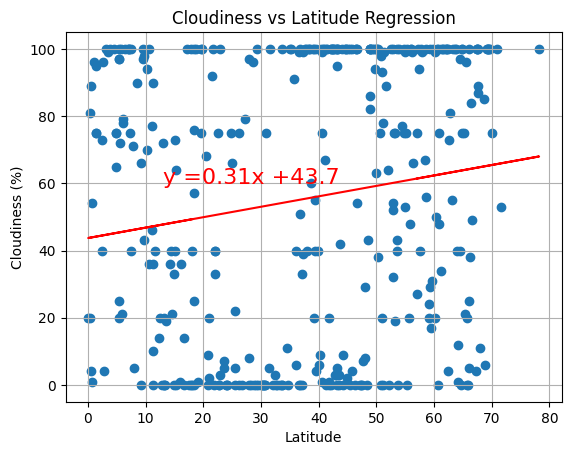

In [140]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_lin_reg(x_values, y_values, "Cloudiness (%)", (13, 60), "Cloudiness vs Latitude Regression")

The r-value is: 0.12006996079714297


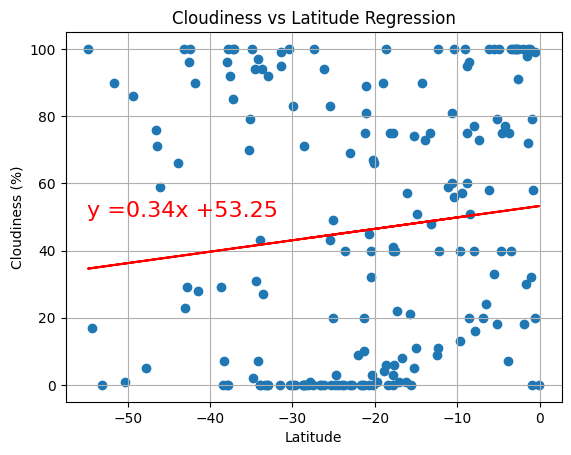

In [141]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_lin_reg(x_values, y_values, "Cloudiness (%)", (-55, 50), "Cloudiness vs Latitude Regression")

**Discussion about the linear relationship:** There does not appear to be any correlation between the latitude of a location and the frequency of a cloudy day experienced in that location, for either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0008389687416998885


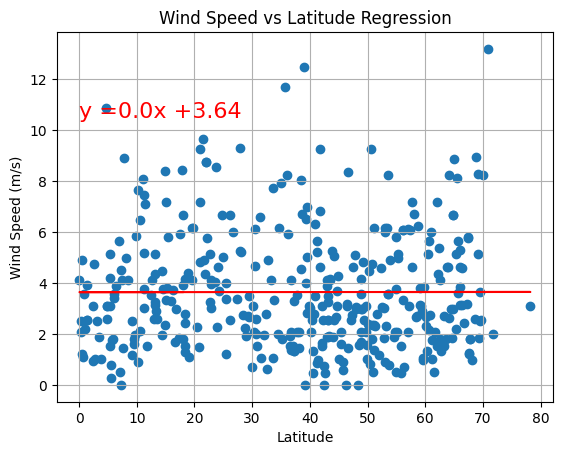

In [142]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_lin_reg(x_values, y_values, "Wind Speed (m/s)", (0, 10.5), "Wind Speed vs Latitude Regression")

The r-value is: -0.11285482735793556


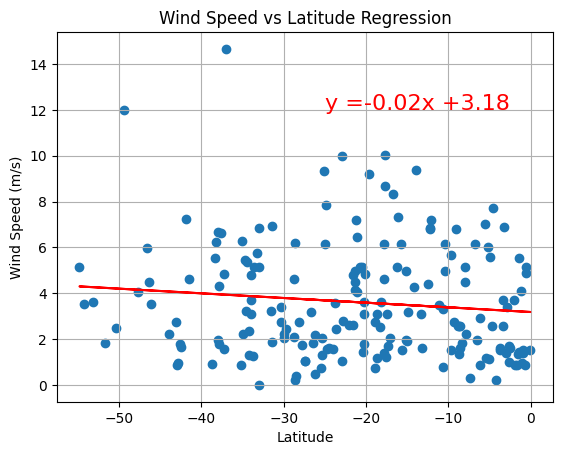

In [143]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_lin_reg(x_values, y_values, "Wind Speed (m/s)", (-25, 12), "Wind Speed vs Latitude Regression")

**Discussion about the linear relationship:** There does not appear to be any correlation between the latitude of a location and the wind speed experienced in that location, for either hemisphere.